In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord

import random
import numpy as np
import scipy as sc
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import pi
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap

## Thesis Mr.Taefi

```sql
SELECT gaia_source.source_id, gaia_source.ra ,
gaia_source.ra_error, gaia_source.dec ,
gaia_source.dec_error, gaia_source.parallax,
gaia_source.parallax_error, gaia_source.pmra,
gaia_source.pmdec, gaia_source.phot_g_mean_mag,
gaia_source.bp_rp, gaia_source.bp_g,
gaia_source.g_rp, gaia_source.radial_velocity,
gaia_source.radial_velocity_error, gaia_source.phot_variable_flag,
gaia_source.l, gaia_source.b,
gaia_source.teff_val, gaia_source.a_g_val,
dist.r_est, dist.r_lo, dist.r_hi,
dist.r_len
FROM gaiadr2.gaia_source 
LEFT JOIN external.gaiadr2_geometric_distance as dist on (gaia_source.source_id = dist.source_id )
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),
		COORD2(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),
		30)
)=1
```

In [2]:
df = pd.read_csv('../data/M67-result.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              5986 non-null   int64  
 1   ra                     5986 non-null   float64
 2   ra_error               5986 non-null   float64
 3   dec                    5986 non-null   float64
 4   dec_error              5986 non-null   float64
 5   parallax               5142 non-null   float64
 6   parallax_error         5142 non-null   float64
 7   pmra                   5142 non-null   float64
 8   pmdec                  5142 non-null   float64
 9   phot_g_mean_mag        5986 non-null   float64
 10  bp_rp                  5464 non-null   float64
 11  bp_g                   5466 non-null   float64
 12  g_rp                   5464 non-null   float64
 13  radial_velocity        141 non-null    float64
 14  radial_velocity_error  141 non-null    float64
 15  phot

### distance function

In [4]:
def distance(df4):
    
    df7 = pd.DataFrame()
    Rt = []
    
    for i in range(len(df4['ra'])):
        Rt1 = []
        Rt2 = []
        
        df7[df4['source_id'][i]] = np.zeros((len(df4['ra'])))
        
        if i > 0:
            Rt1 = np.array(df7.iloc[i][0:i])
        
        #calculate the distance between every star in Data 
        for j in range(i, len(df4['ra'])):
        
            r = ((df4['r_est'][i]/2) + (df4['r_est'][i]/2))
            
            a = (df4['ra'][i] - df4['ra'][j]) * (pi/180) 
            
            b = (df4['dec'][i] - df4['dec'][j])*(pi/180)
            
            c = (df4['r_est'][i] - df4['r_est'][j])
            
            R = (((a*r)**2) + ((b*r)**2) + (c**2))**0.5
            
            Rt1 = np.append(Rt1,R)
        
        df7[df4['source_id'][i]] = Rt1 
        
    # returning the final Data as a DataFrame 
    return df7
            

### knn density

In [7]:
def knn_density(df4, df6):
    
    df5 = pd.DataFrame( columns =['source_id', 'R_10', 'Mt', 'Ro_10'])
    dist_two = []
    for i in range(len(df4['source_id'])):
        
        # choosing one star
        a = df6['source_id'][i]
        R_10 = 0
        Mt = 0
        Ro_10 = 0
        dist_two = list(df6[a])
        
        # calculating the 10 th nearest star to the chosen one
        for n in range(11):
            for k in range(len(dist_two)):
                if (dist_two[k] == min(dist_two)):
                    
                    v = k
                    Mt = Mt + df6['Mass'][v]
                    
                    # knn density
                    if n == 10:
                        R_10 = float(dist_two[v])
                        Ro_10 = (Mt / ( (4/3) * pi * (R_10 **3) ))
                    
                    dist_two[v] = 10000
                    break
        # creating the final DataFrame
        df5 = df5.append({'source_id': str(df6[source_id][i]),
                          'R_10': R_10,
                          'Mt': Mt,
                          'Ro_10': Ro_10} ,
                          ignore_index = True)
    return df5

### Artificial DATA


### uniform 

In [19]:
Radial = 5 # Radius of sample
random.seed(16)
s_id = []
xt = []
x = []
yt = []
y = []
zt = []
z = []
flag = []
i = 0

# generating sample
while (True):
    x1 = random.uniform(-15, 15)
    y1 = random.uniform(-15, 15)
    z1 = random.uniform(-15, 15)
    
    xt.append(x1)
    yt.append(y1)
    zt.append(z1)

    s_id.append(i)
    i += 1
    r = ((x1**2) + (y1**2) + (z1**2))**0.5
    
    if r <= Radial:
        x.append(x1)
        y.append(y1)
        z.append(z1)
        flag.append(True)
    else:
        flag.append(False)
        
    if len(xt) > 819:
        break
        
n = 820
print(len(x))

while (True):
    x1 = random.uniform(-4, 4)
    y1 = random.uniform(-4, 4)
    z1 = random.uniform(-4, 4)
    
    r = ((x1**2) + (y1**2) + (z1**2))**0.5

    if r <= Radial:
        xt.append(x1)
        yt.append(y1)
        zt.append(z1)
        
        n += 1
        s_id.append(i)
        
        x.append(x1)
        y.append(y1)
        z.append(z1)
        
        flag.append(True)
    if len(x) >= 200:
        break

# Saving the sample
data = list(zip(s_id, xt, yt, zt, flag))
df = pd.DataFrame(data, columns = ['s_id', 'X−Axis', 'Y−Axis', 'Z−Axis', 'Flag'] )

20


In [9]:
df['Flag'].value_counts()

False    800
True     200
Name: Flag, dtype: int64

In [10]:
class Sample_Uniform:
    def __init__(self, radial, c_radial, seed=101):
        self.radial = radial
        self.c_radial = c_radial
        np.random.seed(seed)
        self.s_id = []
        self.x = []
        self.y = []
        self.z = []
        self.flag = []
        self.n = 0
        self.counter = 0

    def generate_sample(self, num_points):
        # to have only num_points True flags
        while self.counter < num_points:  
            x1, y1, z1 = np.random.uniform(-15, 15, size=3)
            r = np.sqrt(x1**2 + y1**2 + z1**2)

            self.s_id.append(self.n)
            self.n += 1
            
            self.x.append(x1)
            self.y.append(y1)
            self.z.append(z1)
            
            if (r <= self.radial): 
                self.flag.append(True)
                self.counter += 1
            else:
                self.flag.append(False)
        
        self.counter = 0
        # generate near stars
        while self.counter < int(len(self.x)/5):
            x1, y1, z1 = np.random.uniform(-self.c_radial, self.c_radial, size=3)
            r = np.sqrt(x1**2 + y1**2 + z1**2)
            
            # only accept near center ones
            if r <= self.radial:
                self.s_id.append(self.n)
                self.n += 1
                
                self.x.append(x1)
                self.y.append(y1)
                self.z.append(z1)
                
                self.flag.append(True)
                self.counter += 1
            
    def save_sample(self):
        data = list(zip(self.s_id,
                        self.x,
                        self.y,
                        self.z,
                        self.flag))
        df = pd.DataFrame(data, columns=['s_id', 'x', 'y', 'z', 'flag'])
        return df


sample = Sample_Uniform(radial=5, c_radial=4, seed=1)
sample.generate_sample(num_points=200)
df = sample.save_sample()
print(len(df))

11749


In [11]:
df['flag'].value_counts()

False    9200
True     2549
Name: flag, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

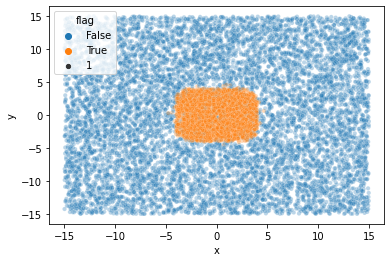

In [12]:
sns.scatterplot(data=df, x='x', y="y", hue='flag', size=1, alpha=.3)

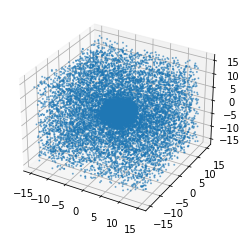

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs= df['x'], ys= df['y'], zs=df['z'], s=1, alpha=0.5)

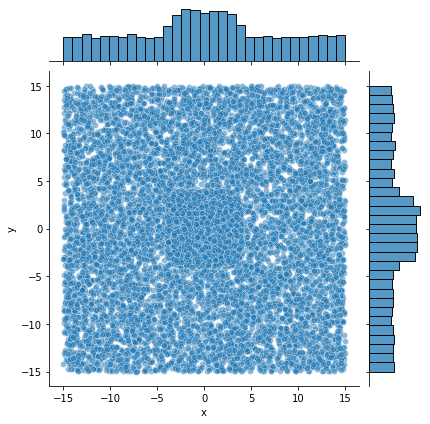

In [14]:
sns.jointplot(data=df, x='x', y="y", alpha=.5)

### normal

In [44]:
Radial = 5 # Radius of sample
np.random.seed(16)
s_id = []
xt = []
x = []
yt = []
y = []
zt = []
z = []
flag = []
i = 0

# generating sample
while (True):
    x1 = random.gauss(0, 2.1)
    y1 = random.gauss(0, 2.1)
    z1 = random.gauss(0, 2.1)
    
    xt.append(x1)
    yt.append(y1)
    zt.append(z1)

    s_id.append(i)
    i += 1
    r = ((x1**2) + (y1**2) + (z1**2))**0.5
    
    if r <= Radial:
        x.append(x1)
        y.append(y1)
        z.append(z1)
        flag.append(True)
    else:
        flag.append(False)
        
    if len(xt) > 819:
        break
        
n = 820
print(len(x))

while (True):
    x1 = random.gauss(0, 2.1)
    y1 = random.gauss(0, 2.1)
    z1 = random.gauss(0, 2.1)
    
    r = ((x1**2) + (y1**2) + (z1**2))**0.5

    if r <= Radial:
        xt.append(x1)
        yt.append(y1)
        zt.append(z1)
        
        n += 1
        s_id.append(i)
        
        x.append(x1)
        y.append(y1)
        z.append(z1)
        
        flag.append(True)
    if len(x) >= 200:
        break

# Saving the sample
data = list(zip(s_id, xt, yt, zt, flag))
df = pd.DataFrame(data, columns = ['s_id', 'X−Axis', 'Y−Axis', 'Z−Axis', 'Flag'] )

714


**Notes:** 
* one could estimate clusters mean density and then based on that density generate stars(cuz I think our density is greater than whats needed).
* Why some *False flags* are in the center?

In [51]:
class Sample_Normal:
    def __init__(self, radial, mu, sd, seed=101):
        self.radial = radial
        self.mu = mu
        self.sd = sd
        np.random.seed(seed)
        self.s_id = []
        self.x = []
        self.y = []
        self.z = []
        self.flag = []
        self.n = 0
        self.counter = 0

    def generate_sample(self, num_points):
        n_stars = 0
        while self.counter < num_points:  # to have only num_points True flags
            x1, y1, z1 = np.random.normal(loc=self.mu, scale=self.sd + 10, size=3)
            r = np.sqrt(x1**2 + y1**2 + z1**2)

            self.s_id.append(self.n)
            self.n += 1
            
            self.x.append(x1)
            self.y.append(y1)
            self.z.append(z1)
            
            if (r <= self.radial): 
                self.flag.append(True)
                self.counter += 1
                n_stars += 1
            else:
                self.flag.append(False)
                
        self.counter = 0
        # generate near stars
        while self.counter < int(len(self.x)/5):
            x1, y1, z1 = np.random.normal(loc=self.mu, scale=self.sd + 10, size=3)
            r = np.sqrt(x1**2 + y1**2 + z1**2)
            
            # only accept near center ones
            if r <= self.radial:
                self.s_id.append(self.n)
                self.n += 1
                
                self.x.append(x1)
                self.y.append(y1)
                self.z.append(z1)
                
                self.flag.append(True)
                self.counter += 1
                
                n_stars += 1
        print('Cluster stars: ', n_stars)

    def save_sample(self):
        data = list(zip(self.s_id,
                        self.x,
                        self.y,
                        self.z,
                        self.flag))
        df = pd.DataFrame(data, columns=['s_id', 'x', 'y', 'z', 'flag'])
        return df


sample = Sample_Normal(radial=5, mu=0, sd=2.1, seed= 1)
sample.generate_sample(num_points=200)
df = sample.save_sample()
print(len(df))

Cluster stars:  3110
14552


In [52]:
df['flag'].value_counts()

False    11442
True      3110
Name: flag, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

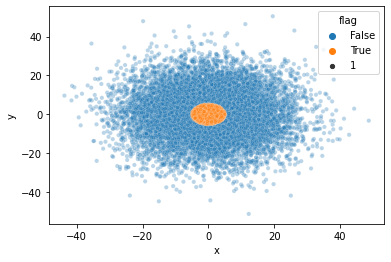

In [67]:
sns.scatterplot(data=df, x='x', y="y", hue='flag', size=1, alpha=.3)

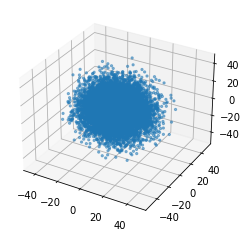

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs= df['x'], ys= df['y'], zs=df['z'], s=5, alpha=0.5, depthshade=True)

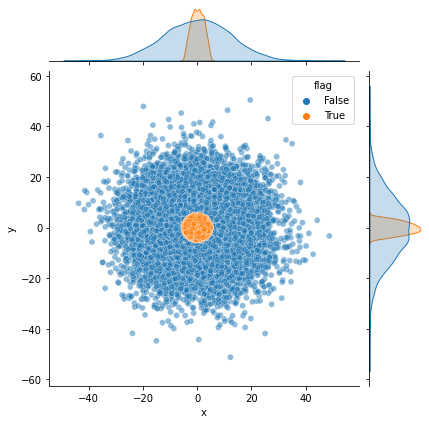

In [54]:
sns.jointplot(data=df, x='x', y="y", hue='flag', alpha=.5, )